In [1]:
install.packages("DataExplorer")


also installing the dependencies ‘igraph’, ‘gridExtra’, ‘networkD3’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
library(DataExplorer)

In [5]:
clusterData = read.csv('Clustered5568FeatureVectors.csv', header = TRUE)

In [31]:
head(clusterData)

,MDI,RespRate,RMSSD,MADI,RMI,RMS_DA,RF,BPI,label
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.6383333,15,0.8302761,1.775,0.4213016,1.0191692,0.01675000,0.2554689,5
2,0.5660000,13,0.6350905,1.080,0.3627150,0.9940236,0.05050000,0.1853532,5
3,0.4700000,15,0.5088516,0.705,0.3953296,0.9971468,0.00000000,0.2323357,5
4,0.3483333,15,0.4816119,0.940,0.4028450,0.9837721,0.01666667,0.2386513,5
5,0.4610000,14,0.4997950,0.735,0.3846904,1.0088626,0.01675000,0.2243535,5
6,0.3840000,14,0.4620822,0.730,0.3718672,1.0052187,0.01666667,0.2155469,5


In [6]:
create_report(clusterData)



processing file: report.rmd



1/42                                 
2/42 [global_options]                
3/42                                 
4/42 [introduce]                     
5/42                                 
6/42 [plot_intro]                    
7/42                                 
8/42 [data_structure]                
9/42                                 
10/42 [missing_profile]               
11/42                                 
12/42 [univariate_distribution_header]
13/42                                 
14/42 [plot_histogram]                
15/42                                 
16/42 [plot_density]                  
17/42                                 
18/42 [plot_frequency_bar]            
19/42                                 
20/42 [plot_response_bar]             
21/42                                 
22/42 [plot_with_bar]                 
23/42                                 
24/42 [plot_normal_qq]                
25/42                                 
26/42 [plot_response_qq]          

output file: /home/jovyan/Nautilus_Kubernetes_DeepLearning/report.knit.md




/opt/conda/bin/pandoc +RTS -K512m -RTS /home/jovyan/Nautilus_Kubernetes_DeepLearning/report.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output /home/jovyan/Nautilus_Kubernetes_DeepLearning/report.html --lua-filter /opt/conda/lib/R/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /opt/conda/lib/R/library/rmarkdown/rmarkdown/lua/latex-div.lua --embed-resources --standalone --variable bs3=TRUE --section-divs --table-of-contents --toc-depth 6 --template /opt/conda/lib/R/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=yeti --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /tmp/Rtmp5SIKtm/rmarkdown-strfd377b4bae.html 



Output created: report.html



ERROR: Error in browseURL(report_path): 'browser' must be a non-empty character string


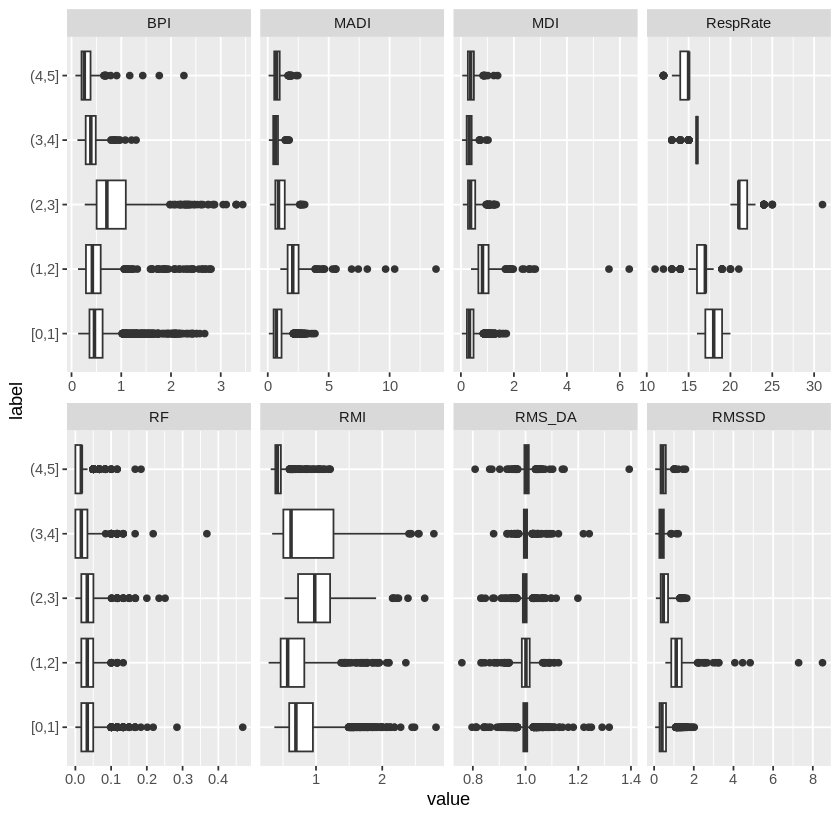

In [8]:
plot_boxplot(clusterData, by = "label")

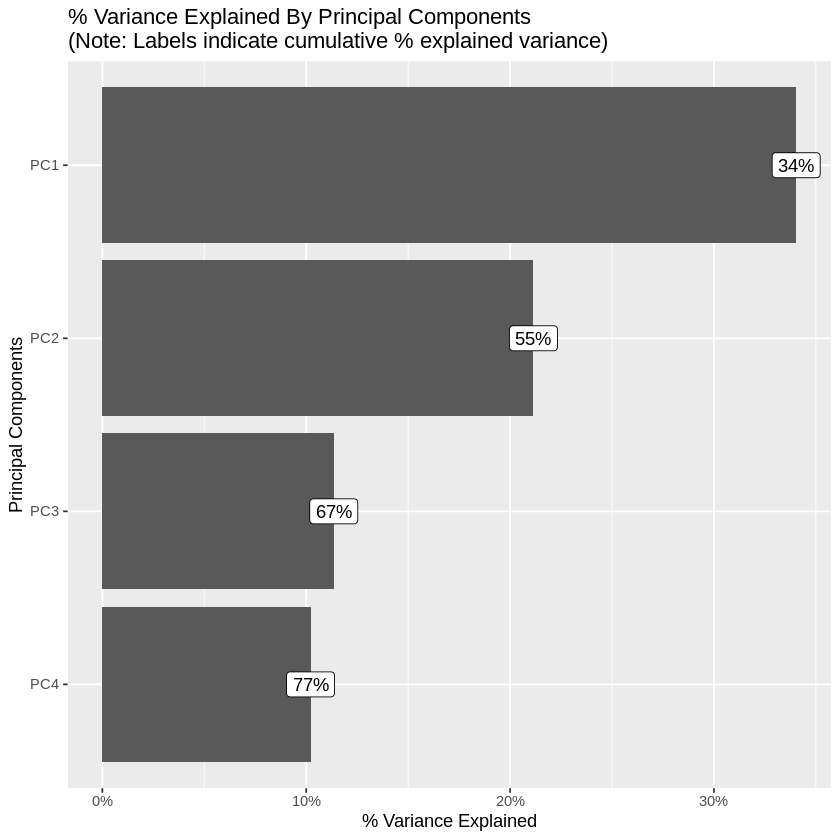

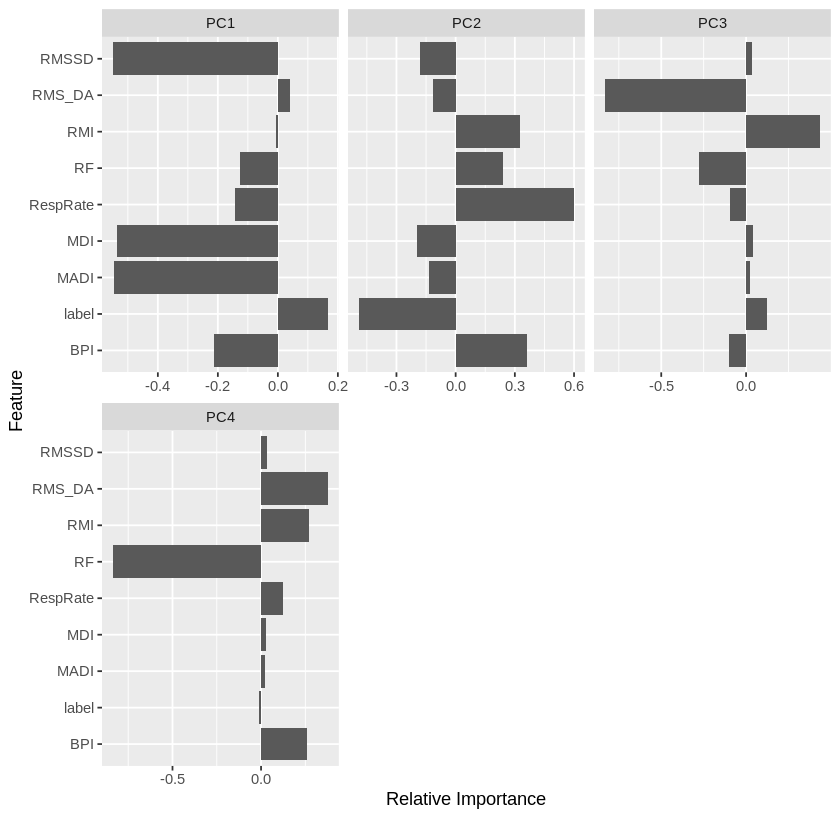

In [9]:
plot_prcomp(clusterData,maxcat = 5L)

#  Normality Tests to confirm data is Non-Normal
## And parameterized statistical methods are not appropriate

In [23]:
# MDI RespRate	RMSSD	MADI	RMI	RMS_DA	RF	BPI
cat("\nShapiro-Wilk MDI")
shapiro.test(sample(clusterData$MDI,5000))
cat("\nShapiro-Wilk RespRate")
shapiro.test(sample(clusterData$RespRate,5000))
cat("\nShapiro-Wilk RMSSD")
shapiro.test(sample(clusterData$RMSSD,5000))
cat("\nShapiro-Wilk MADI")
shapiro.test(sample(clusterData$MADI,5000))
cat("\nShapiro-Wilk RMI")
shapiro.test(sample(clusterData$RMI,5000))
cat("\nShapiro-Wilk RMS_DA")
shapiro.test(sample(clusterData$RMS_DA,5000))
cat("\nShapiro-Wilk RF")
shapiro.test(sample(clusterData$RF,5000))
cat("\nShapiro-Wilk BPI")
shapiro.test(sample(clusterData$BPI,5000))


Shapiro-Wilk MDI


	Shapiro-Wilk normality test

data:  sample(clusterData$MDI, 5000)
W = 0.7504, p-value < 2.2e-16



Shapiro-Wilk RespRate


	Shapiro-Wilk normality test

data:  sample(clusterData$RespRate, 5000)
W = 0.96108, p-value < 2.2e-16



Shapiro-Wilk RMSSD


	Shapiro-Wilk normality test

data:  sample(clusterData$RMSSD, 5000)
W = 0.76243, p-value < 2.2e-16



Shapiro-Wilk MADI


	Shapiro-Wilk normality test

data:  sample(clusterData$MADI, 5000)
W = 0.7656, p-value < 2.2e-16



Shapiro-Wilk RMI


	Shapiro-Wilk normality test

data:  sample(clusterData$RMI, 5000)
W = 0.84852, p-value < 2.2e-16



Shapiro-Wilk RMS_DA


	Shapiro-Wilk normality test

data:  sample(clusterData$RMS_DA, 5000)
W = 0.73799, p-value < 2.2e-16



Shapiro-Wilk RF


	Shapiro-Wilk normality test

data:  sample(clusterData$RF, 5000)
W = 0.81764, p-value < 2.2e-16



Shapiro-Wilk BPI


	Shapiro-Wilk normality test

data:  sample(clusterData$BPI, 5000)
W = 0.71213, p-value < 2.2e-16


# Post-Hoc analysis of clusters through ANOVA

### Since the data is non-normal, we are assuming non-parametric, we will use the Kruskal-Wallis test.

### Null Hypothesis that all clusters (e.g., labels) are the same.

In [40]:
# MDI RespRate	RMSSD	MADI	RMI	RMS_DA	RF	BPI
cat("\n Kruskal-Wallis MDI")
kruskal.test(MDI ~ label, data = clusterData)
cat("\nShapiro-Wilk RespRate")
kruskal.test(RespRate ~ label, data = clusterData)
cat("\nShapiro-Wilk RMSSD")
kruskal.test(RMSSD ~ label, data = clusterData)
cat("\nShapiro-Wilk MADI")
kruskal.test(MADI ~ label, data = clusterData)
cat("\nShapiro-Wilk RMI")
kruskal.test(RMI ~ label, data = clusterData)
cat("\nShapiro-Wilk RMS_DA")
kruskal.test(RMS_DA ~ label, data = clusterData)
cat("\nShapiro-Wilk RF")
kruskal.test(RF ~ label, data = clusterData)
cat("\nShapiro-Wilk BPI")
kruskal.test(BPI ~ label, data = clusterData)



 Kruskal-Wallis MDI


	Kruskal-Wallis rank sum test

data:  MDI by label
Kruskal-Wallis chi-squared = 1553.7, df = 5, p-value < 2.2e-16



Shapiro-Wilk RespRate


	Kruskal-Wallis rank sum test

data:  RespRate by label
Kruskal-Wallis chi-squared = 5123.1, df = 5, p-value < 2.2e-16



Shapiro-Wilk RMSSD


	Kruskal-Wallis rank sum test

data:  RMSSD by label
Kruskal-Wallis chi-squared = 1667, df = 5, p-value < 2.2e-16



Shapiro-Wilk MADI


	Kruskal-Wallis rank sum test

data:  MADI by label
Kruskal-Wallis chi-squared = 1768.1, df = 5, p-value < 2.2e-16



Shapiro-Wilk RMI


	Kruskal-Wallis rank sum test

data:  RMI by label
Kruskal-Wallis chi-squared = 1655.1, df = 5, p-value < 2.2e-16



Shapiro-Wilk RMS_DA


	Kruskal-Wallis rank sum test

data:  RMS_DA by label
Kruskal-Wallis chi-squared = 87.454, df = 5, p-value < 2.2e-16



Shapiro-Wilk RF


	Kruskal-Wallis rank sum test

data:  RF by label
Kruskal-Wallis chi-squared = 370.14, df = 5, p-value < 2.2e-16



Shapiro-Wilk BPI


	Kruskal-Wallis rank sum test

data:  BPI by label
Kruskal-Wallis chi-squared = 1422.1, df = 5, p-value < 2.2e-16


In [45]:
install.packages("multcomp")
library(multcomp)

also installing the dependency ‘TH.data’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




# Post-Hoc Test of rejection of Null Hypothesis that all clusters are the same.

### Done on Feature per Feature   `# MDI RespRate	RMSSD	MADI	RMI	RMS_DA	RF	BPI`
#### MDI

In [51]:
clusterData$label = factor(clusterData$label)
res_aov <- aov(MDI ~ label,   data = clusterData )
post_test <- glht(res_aov,   linfct = mcp(label = "Tukey") )

summary(post_test)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = MDI ~ label, data = clusterData)

Linear Hypotheses:
            Estimate Std. Error t value Pr(>|t|)    
1 - 0 == 0 -0.210944   0.008812 -23.938  < 0.001 ***
2 - 0 == 0  0.414639   0.012697  32.657  < 0.001 ***
3 - 0 == 0 -0.063502   0.011890  -5.341  < 0.001 ***
4 - 0 == 0 -0.176935   0.009839 -17.983  < 0.001 ***
5 - 0 == 0 -0.106247   0.010755  -9.879  < 0.001 ***
2 - 1 == 0  0.625583   0.012371  50.568  < 0.001 ***
3 - 1 == 0  0.147442   0.011542  12.774  < 0.001 ***
4 - 1 == 0  0.034009   0.009415   3.612  0.00402 ** 
5 - 1 == 0  0.104697   0.010369  10.098  < 0.001 ***
3 - 2 == 0 -0.478141   0.014723 -32.475  < 0.001 ***
4 - 2 == 0 -0.591574   0.013123 -45.081  < 0.001 ***
5 - 2 == 0 -0.520886   0.013823 -37.684  < 0.001 ***
4 - 3 == 0 -0.113433   0.012344  -9.189  < 0.001 ***
5 - 3 == 0 -0.042745   0.013086  -3.266  0.01328 *  
5 - 4 == 0  0.070688   0.011255

#### RespRate

In [52]:
res_aov <- aov(RespRate ~ label,   data = clusterData )
post_test <- glht(res_aov,   linfct = mcp(label = "Tukey") )

summary(post_test)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = RespRate ~ label, data = clusterData)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
1 - 0 == 0 -1.70646    0.02517  -67.79   <2e-16 ***
2 - 0 == 0 -2.66135    0.03627  -73.38   <2e-16 ***
3 - 0 == 0  2.55747    0.03397   75.29   <2e-16 ***
4 - 0 == 0 -3.22719    0.02811 -114.82   <2e-16 ***
5 - 0 == 0 -4.54566    0.03072 -147.95   <2e-16 ***
2 - 1 == 0 -0.95490    0.03534  -27.02   <2e-16 ***
3 - 1 == 0  4.26392    0.03297  129.32   <2e-16 ***
4 - 1 == 0 -1.52074    0.02690  -56.54   <2e-16 ***
5 - 1 == 0 -2.83921    0.02962  -95.86   <2e-16 ***
3 - 2 == 0  5.21882    0.04206  124.08   <2e-16 ***
4 - 2 == 0 -0.56584    0.03749  -15.09   <2e-16 ***
5 - 2 == 0 -1.88431    0.03949  -47.72   <2e-16 ***
4 - 3 == 0 -5.78466    0.03526 -164.04   <2e-16 ***
5 - 3 == 0 -7.10313    0.03738 -190.02   <2e-16 ***
5 - 4 == 0 -1.31847    0.03215  -41.01   

#### RMSSD

In [53]:
res_aov <- aov(RMSSD ~ label,   data = clusterData )
post_test <- glht(res_aov,   linfct = mcp(label = "Tukey") )

summary(post_test)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = RMSSD ~ label, data = clusterData)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
1 - 0 == 0 -0.30591    0.01150 -26.592   <0.001 ***
2 - 0 == 0  0.56582    0.01658  34.137   <0.001 ***
3 - 0 == 0 -0.10163    0.01552  -6.548   <0.001 ***
4 - 0 == 0 -0.26781    0.01284 -20.850   <0.001 ***
5 - 0 == 0 -0.18454    0.01404 -13.144   <0.001 ***
2 - 1 == 0  0.87172    0.01615  53.977   <0.001 ***
3 - 1 == 0  0.20428    0.01507  13.557   <0.001 ***
4 - 1 == 0  0.03810    0.01229   3.100   0.0229 *  
5 - 1 == 0  0.12137    0.01354   8.967   <0.001 ***
3 - 2 == 0 -0.66745    0.01922 -34.726   <0.001 ***
4 - 2 == 0 -0.83362    0.01713 -48.662   <0.001 ***
5 - 2 == 0 -0.75035    0.01804 -41.583   <0.001 ***
4 - 3 == 0 -0.16617    0.01611 -10.312   <0.001 ***
5 - 3 == 0 -0.08290    0.01708  -4.853   <0.001 ***
5 - 4 == 0  0.08327    0.01469   5.668   <0.

#### MADI

In [54]:
res_aov <- aov(MADI ~ label,   data = clusterData )
post_test <- glht(res_aov,   linfct = mcp(label = "Tukey") )

summary(post_test)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = MADI ~ label, data = clusterData)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
1 - 0 == 0 -0.63089    0.02087 -30.225   <1e-04 ***
2 - 0 == 0  1.00557    0.03007  33.436   <1e-04 ***
3 - 0 == 0 -0.19225    0.02816  -6.826   <1e-04 ***
4 - 0 == 0 -0.58838    0.02331 -25.246   <1e-04 ***
5 - 0 == 0 -0.46445    0.02547 -18.232   <1e-04 ***
2 - 1 == 0  1.63646    0.02930  55.846   <1e-04 ***
3 - 1 == 0  0.43864    0.02734  16.044   <1e-04 ***
4 - 1 == 0  0.04251    0.02230   1.906     0.39    
5 - 1 == 0  0.16644    0.02456   6.777   <1e-04 ***
3 - 2 == 0 -1.19782    0.03487 -34.347   <1e-04 ***
4 - 2 == 0 -1.59395    0.03108 -51.281   <1e-04 ***
5 - 2 == 0 -1.47002    0.03274 -44.898   <1e-04 ***
4 - 3 == 0 -0.39613    0.02924 -13.548   <1e-04 ***
5 - 3 == 0 -0.27220    0.03100  -8.782   <1e-04 ***
5 - 4 == 0  0.12393    0.02666   4.649   <1e-

#### RMI

In [55]:
res_aov <- aov(RMI ~ label,   data = clusterData )
post_test <- glht(res_aov,   linfct = mcp(label = "Tukey") )

summary(post_test)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = RMI ~ label, data = clusterData)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
1 - 0 == 0 -0.06586    0.01383  -4.761   <0.001 ***
2 - 0 == 0 -0.12254    0.01993  -6.149   <0.001 ***
3 - 0 == 0  0.14181    0.01866   7.598   <0.001 ***
4 - 0 == 0  0.03396    0.01544   2.199   0.2320    
5 - 0 == 0 -0.40174    0.01688 -23.798   <0.001 ***
2 - 1 == 0 -0.05669    0.01942  -2.919   0.0396 *  
3 - 1 == 0  0.20767    0.01812  11.463   <0.001 ***
4 - 1 == 0  0.09982    0.01478   6.754   <0.001 ***
5 - 1 == 0 -0.33589    0.01628 -20.638   <0.001 ***
3 - 2 == 0  0.26435    0.02311  11.439   <0.001 ***
4 - 2 == 0  0.15651    0.02060   7.598   <0.001 ***
5 - 2 == 0 -0.27920    0.02170 -12.868   <0.001 ***
4 - 3 == 0 -0.10785    0.01938  -5.566   <0.001 ***
5 - 3 == 0 -0.54355    0.02054 -26.463   <0.001 ***
5 - 4 == 0 -0.43571    0.01767 -24.664   <0.00

#### RMS_DA

In [56]:
res_aov <- aov(RMS_DA ~ label,   data = clusterData )
post_test <- glht(res_aov,   linfct = mcp(label = "Tukey") )

summary(post_test)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = RMS_DA ~ label, data = clusterData)

Linear Hypotheses:
             Estimate Std. Error t value Pr(>|t|)    
1 - 0 == 0  0.0002527  0.0009894   0.255   0.9998    
2 - 0 == 0  0.0004449  0.0014256   0.312   0.9996    
3 - 0 == 0 -0.0022711  0.0013351  -1.701   0.5229    
4 - 0 == 0  0.0018523  0.0011048   1.677   0.5394    
5 - 0 == 0  0.0056090  0.0012076   4.645   <0.001 ***
2 - 1 == 0  0.0001921  0.0013891   0.138   1.0000    
3 - 1 == 0 -0.0025238  0.0012960  -1.947   0.3653    
4 - 1 == 0  0.0015995  0.0010572   1.513   0.6485    
5 - 1 == 0  0.0053563  0.0011642   4.601   <0.001 ***
3 - 2 == 0 -0.0027159  0.0016532  -1.643   0.5620    
4 - 2 == 0  0.0014074  0.0014734   0.955   0.9295    
5 - 2 == 0  0.0051641  0.0015520   3.327   0.0109 *  
4 - 3 == 0  0.0041233  0.0013860   2.975   0.0335 *  
5 - 3 == 0  0.0078801  0.0014693   5.363   <0.001 ***
5 - 4 == 0  0

#### RF

In [57]:
res_aov <- aov(RF ~ label,   data = clusterData )
post_test <- glht(res_aov,   linfct = mcp(label = "Tukey") )

summary(post_test)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = RF ~ label, data = clusterData)

Linear Hypotheses:
             Estimate Std. Error t value Pr(>|t|)    
1 - 0 == 0 -0.0068060  0.0011441  -5.949   <0.001 ***
2 - 0 == 0 -0.0069676  0.0016485  -4.227   <0.001 ***
3 - 0 == 0  0.0008127  0.0015438   0.526   0.9949    
4 - 0 == 0 -0.0121542  0.0012774  -9.514   <0.001 ***
5 - 0 == 0 -0.0217639  0.0013964 -15.586   <0.001 ***
2 - 1 == 0 -0.0001617  0.0016062  -0.101   1.0000    
3 - 1 == 0  0.0076187  0.0014985   5.084   <0.001 ***
4 - 1 == 0 -0.0053482  0.0012224  -4.375   <0.001 ***
5 - 1 == 0 -0.0149579  0.0013462 -11.111   <0.001 ***
3 - 2 == 0  0.0077803  0.0019116   4.070   <0.001 ***
4 - 2 == 0 -0.0051866  0.0017037  -3.044   0.0272 *  
5 - 2 == 0 -0.0147962  0.0017946  -8.245   <0.001 ***
4 - 3 == 0 -0.0129669  0.0016027  -8.091   <0.001 ***
5 - 3 == 0 -0.0225766  0.0016990 -13.288   <0.001 ***
5 - 4 == 0 -0.009

#### BPI

In [58]:
res_aov <- aov(BPI ~ label,   data = clusterData )
post_test <- glht(res_aov,   linfct = mcp(label = "Tukey") )

summary(post_test)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = BPI ~ label, data = clusterData)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
1 - 0 == 0 -0.15140    0.01346 -11.246  < 1e-04 ***
2 - 0 == 0 -0.07990    0.01940  -4.119  0.00059 ***
3 - 0 == 0  0.24788    0.01817  13.645  < 1e-04 ***
4 - 0 == 0 -0.25321    0.01503 -16.844  < 1e-04 ***
5 - 0 == 0 -0.34770    0.01643 -21.161  < 1e-04 ***
2 - 1 == 0  0.07150    0.01890   3.783  0.00212 ** 
3 - 1 == 0  0.39928    0.01763  22.643  < 1e-04 ***
4 - 1 == 0 -0.10180    0.01438  -7.077  < 1e-04 ***
5 - 1 == 0 -0.19629    0.01584 -12.392  < 1e-04 ***
3 - 2 == 0  0.32778    0.02249  14.572  < 1e-04 ***
4 - 2 == 0 -0.17330    0.02005  -8.644  < 1e-04 ***
5 - 2 == 0 -0.26779    0.02112 -12.681  < 1e-04 ***
4 - 3 == 0 -0.50108    0.01886 -26.570  < 1e-04 ***
5 - 3 == 0 -0.59557    0.01999 -29.790  < 1e-04 ***
5 - 4 == 0 -0.09449    0.01719  -5.495  < 1e-0